# Experimental notebook
This is an experimetal Jupyter-Notebook, to test and present the functionality of written code.

In [1]:
""" append parent dir to sys.path for local imports """
import sys
if '..\\' not in sys.path: sys.path.append('..\\')   

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
from stocks.stock import Stock
from analysis.rsi import rsi, rsi_cross_signals
sns.set()

In [2]:
my_stock = Stock('CCC')
my_stock.ohlc.tail()
time_range = pd.date_range('2016-01-01', '2020-09-30')
stock_data = my_stock.ohlc[my_stock.ohlc.index.isin(time_range)]

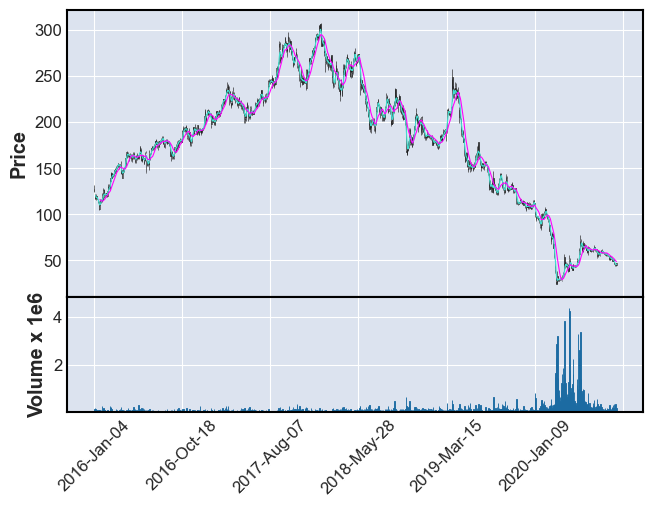

In [3]:
mpf.plot(stock_data, type='candle', volume=True, mav=(5, 15))

In [4]:
stock_data = stock_data.join(rsi(my_stock.ohlc))
stock_data

,Open,High,Low,Close,Volume,RSI
Date,,,,,,
2016-01-04,131.40,131.40,125.75,126.14,79025,36.552290
2016-01-05,125.95,127.97,123.82,124.01,80432,34.607440
2016-01-07,122.09,122.09,116.58,116.87,146764,29.031218
2016-01-08,117.35,120.72,116.49,118.31,168282,31.430870
2016-01-11,117.35,118.94,116.04,117.40,158792,30.723868
...,...,...,...,...,...,...
2020-09-24,46.30,46.50,45.12,45.20,258137,28.885547
2020-09-25,45.22,45.83,43.96,44.04,289349,27.081549
2020-09-28,44.50,46.10,43.52,45.80,338637,33.833553


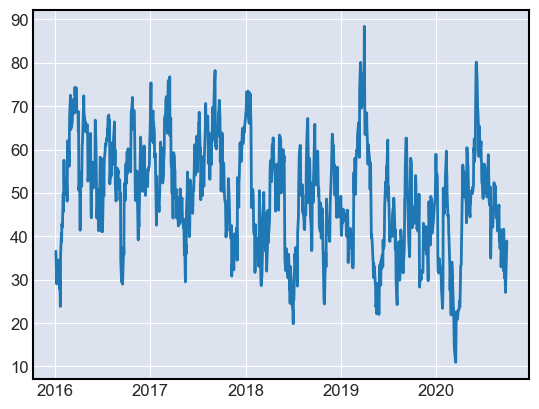

In [5]:
_ = plt.plot(stock_data['RSI'])

In [6]:
stock_data['Buy'] = rsi_cross_signals(stock_data, 30, 'onrise')
stock_data['Sell'] = rsi_cross_signals(stock_data, 70, 'onrise')
stock_data.tail(10)

,Open,High,Low,Close,Volume,RSI,Buy,Sell
Date,,,,,,,,
2020-09-17,50.10,50.98,49.11,49.75,177169,32.021919,False,False
2020-09-18,49.75,52.00,49.75,52.00,307847,41.659001,False,False
2020-09-21,51.14,51.68,48.90,49.42,193350,35.452517,False,False
2020-09-22,48.55,48.55,45.75,46.71,327649,30.339478,False,False
2020-09-23,46.77,48.65,46.24,47.25,129921,32.430656,False,False
2020-09-24,46.30,46.50,45.12,45.20,258137,28.885547,False,False
2020-09-25,45.22,45.83,43.96,44.04,289349,27.081549,False,False
2020-09-28,44.50,46.10,43.52,45.80,338637,33.833553,True,False
2020-09-29,45.85,46.98,45.30,46.30,151310,35.656369,False,False


In [7]:
buy = stock_data[stock_data['Buy']].index

In [8]:
ch = pd.DataFrame()
    
for buy in stock_data[stock_data['Buy']].index:
    d = stock_data.loc[buy:].head(31)['Close']
    d = d.reset_index().drop(['Date'], axis=1)
    ch = ch.append(d.transpose(), ignore_index=True)
ch

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,118.31,117.40,118.17,119.48,118.03,117.79,112.28,113.24,108.86,105.27,...,120.40,120.45,121.22,121.22,122.86,121.99,119.76,124.98,130.35,127.84
1,111.66,114.94,113.00,115.75,115.17,115.07,120.16,116.97,120.87,126.52,...,129.42,129.42,127.40,135.80,139.09,144.89,139.96,141.80,142.27,141.50
2,166.36,165.96,165.57,159.80,162.98,164.01,162.54,169.53,172.56,169.73,...,180.82,179.74,179.84,178.63,184.24,190.59,190.59,191.08,194.11,190.59
3,162.98,164.01,162.54,169.53,172.56,169.73,170.37,173.98,175.94,173.01,...,184.24,190.59,190.59,191.08,194.11,190.59,190.59,193.53,194.51,194.61
4,204.57,207.60,205.11,212.06,216.01,220.50,215.76,207.31,207.31,207.31,...,212.53,212.34,219.48,221.14,219.14,219.92,217.04,219.92,224.21,224.81
5,241.66,243.63,245.99,253.68,254.87,259.80,254.67,246.58,252.50,245.99,...,253.88,258.23,259.40,257.43,252.70,258.42,266.91,268.28,270.26,269.07
6,222.32,217.00,215.02,213.84,211.67,204.17,201.21,192.83,199.24,193.32,...,202.79,211.08,216.40,219.96,221.93,223.90,221.93,212.65,212.06,212.06
7,202.79,202.40,199.64,202.60,201.21,200.03,200.03,193.32,188.89,199.24,...,214.43,208.32,212.06,207.72,206.15,203.59,203.39,207.13,205.75,206.73
8,199.24,202.79,211.08,216.40,219.96,221.93,223.90,221.93,212.65,212.06,...,206.73,214.43,217.59,221.73,228.04,228.83,224.69,222.32,212.65,214.04
9,172.98,178.85,171.78,180.75,193.00,188.32,177.36,181.84,181.15,180.15,...,203.86,207.85,202.47,203.47,195.30,197.49,202.87,202.07,197.89,189.82


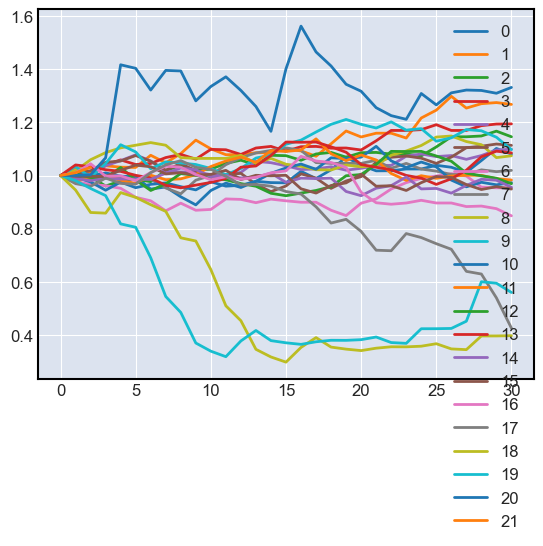

In [9]:
ch.div(ch.loc[:,0], axis=0).transpose().plot()